=======================================================================================
** Data Glacier Internship - Week 2 Assignment : G2M Insight for Cab Investment Firm **
=======================================================================================

=======================================================================================
Client : XYZ (US)
------------------
Description: XYZ is a private firm in US. 
Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, 
it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy 
they want to understand the market before taking final decision.
=======================================================================================

====================================================================================================
Data Sets:
-----------
1 . Cab_Data.csv (359,392 entries)
    •	Contains details about cab rides, including transaction ID, date, company, city, distance travelled, price charged, and cost of the trip.
    •	Potential Issues: "Date of Travel" is stored as an integer instead of a date format.
    •	No duplicates detected
2 . City.csv (20 entries)
    •	Lists cities with population and user count.
    •	Potential Issues: "Population" and "Users" are stored as objects instead of numerical values.
    •	No duplicates detected
3 . Customer_ID.csv (49,171 entries)
    •	Contains customer demographics: ID, gender, age, and income.
    •	No duplicates detected
4 . Transaction_ID.csv (440,098 entries)
    •	Maps transactions to customers and includes payment mode.
    •	No duplicates detected
======================================================================================================

=======================================================================================
Import data:
•	Read the 4 csv files
•	Display datatypes of each column within these csv files
•	Display first few rows
=======================================================================================

In [1]:
import pandas as pd

# File paths
cab_data_path = "Cab_Data.csv"
city_data_path = "City.csv"
customer_data_path = "Customer_ID.csv"
transaction_data_path = "Transaction_ID.csv"

# Load datasets
cab_data = pd.read_csv(cab_data_path)
city_data = pd.read_csv(city_data_path)
customer_data = pd.read_csv(customer_data_path)
transaction_data = pd.read_csv(transaction_data_path)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 612.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0

In [2]:
cab_data_head, city_data_head, customer_data_head, transaction_data_head

(   Transaction ID  Date of Travel   Company        City  KM Travelled  \
 0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
 1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
 2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
 3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
 4        10000015           42372  Pink Cab  ATLANTA GA          8.73   
 
    Price Charged  Cost of Trip  
 0         370.95       313.635  
 1         358.52       334.854  
 2         125.20        97.632  
 3         377.40       351.602  
 4         114.62        97.776  ,
              City   Population      Users
 0     NEW YORK NY   8,405,837    302,149 
 1      CHICAGO IL   1,955,130    164,468 
 2  LOS ANGELES CA   1,595,037    144,132 
 3        MIAMI FL   1,339,155     17,675 
 4  SILICON VALLEY   1,177,609     27,247 ,
    Customer ID Gender  Age  Income (USD/Month)
 0        29290   Male   28               

=======================================================================================
Data Cleaning & Preparation
•	Convert Date of Travel to a proper date format
•	Convert Population & Users to numeric data
•	Merge datasets to create a unified dataset for deeper analysis
=======================================================================================

In [3]:
# Convert 'Date of Travel' to proper date format
cab_data['Date of Travel'] = pd.to_datetime(cab_data['Date of Travel'], origin='1899-12-30', unit='D')

# Convert 'Population' and 'Users' in City data to numeric values
city_data['Population'] = city_data['Population'].str.replace(',', '').astype(int)
city_data['Users'] = city_data['Users'].str.replace(',', '').astype(int)

# Merge datasets for comprehensive analysis
merged_data = cab_data.merge(transaction_data, on="Transaction ID", how="left")
merged_data = merged_data.merge(customer_data, on="Customer ID", how="left")
merged_data = merged_data.merge(city_data, on="City", how="left")

# Display cleaned data structure
merged_data.info()

# Display first few rows after merging
merged_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Customer ID         359392 non-null  int64         
 8   Payment_Mode        359392 non-null  object        
 9   Gender              359392 non-null  object        
 10  Age                 359392 non-null  int64         
 11  Income (USD/Month)  359392 non-null  int64         
 12  Population          359392 non-null  int32         
 13  Users               359392 no

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,814885,24701
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,814885,24701
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,814885,24701
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,814885,24701
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,814885,24701


==========================================
### 1. Seasonal Trends in Cab Usage ###
===========================================

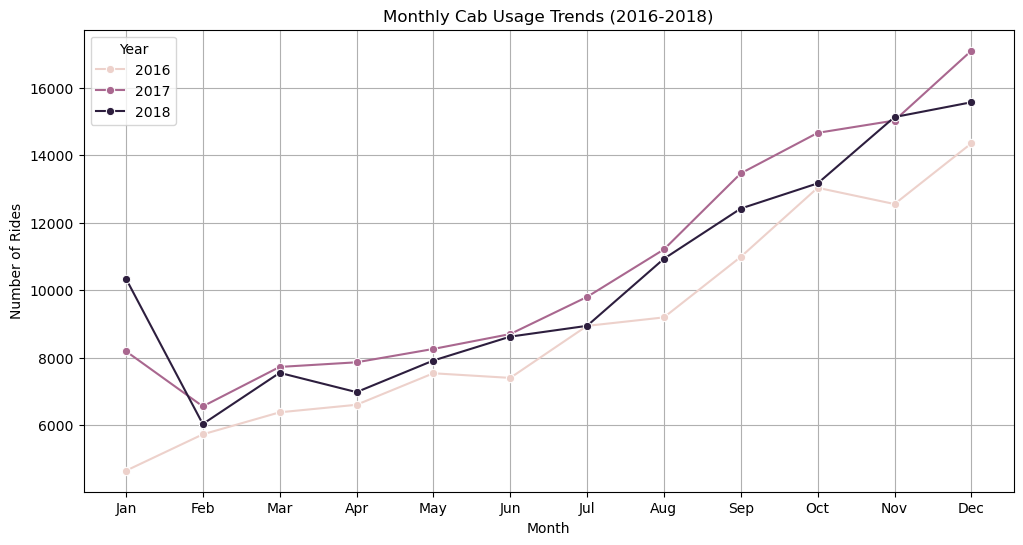

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract month and year from Date of Travel
merged_data['Year'] = merged_data['Date of Travel'].dt.year
merged_data['Month'] = merged_data['Date of Travel'].dt.month

# Aggregate ride counts per month
monthly_rides = merged_data.groupby(['Year', 'Month']).size().reset_index(name='Ride Count')

# Plot seasonal trends
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Ride Count', hue='Year', data=monthly_rides, marker="o")
plt.title("Monthly Cab Usage Trends (2016-2018)")
plt.xlabel("Month")
plt.ylabel("Number of Rides")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend(title="Year")
plt.grid(True)
plt.show()

=====================================================
### 2. Analyze cab demand around major US holidays:
=====================================================

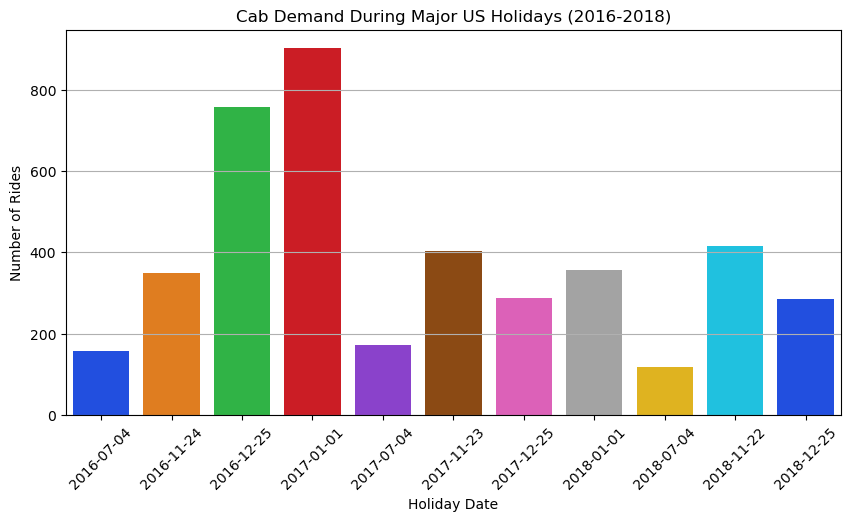

In [15]:
# Define major US holidays (2016-2018) for analysis
us_holidays = [
    "2016-01-01", "2016-07-04", "2016-11-24", "2016-12-25",  # New Year, Independence Day, Thanksgiving, Christmas
    "2017-01-01", "2017-07-04", "2017-11-23", "2017-12-25",
    "2018-01-01", "2018-07-04", "2018-11-22", "2018-12-25"
]

# Convert to datetime format
us_holidays = pd.to_datetime(us_holidays)

# Extract rides on holiday dates
holiday_rides = merged_data[merged_data['Date of Travel'].isin(us_holidays)]

# Aggregate ride count per holiday
holiday_ride_counts = holiday_rides.groupby("Date of Travel").size().reset_index(name="Ride Count")

# Plot holiday ride counts
plt.figure(figsize=(10, 5))

sns.barplot(
    x=holiday_ride_counts["Date of Travel"].dt.strftime('%Y-%m-%d'),
    y=holiday_ride_counts["Ride Count"],
    hue=holiday_ride_counts["Date of Travel"].dt.strftime('%Y-%m-%d'),
    palette="bright",
    legend=False
)
plt.xticks(rotation=45)
plt.title("Cab Demand During Major US Holidays (2016-2018)")
plt.xlabel("Holiday Date")
plt.ylabel("Number of Rides")
plt.grid(axis='y')
plt.show()

=====================================================
### 3. Seasonal ride trends and Revenue analysis :
=====================================================

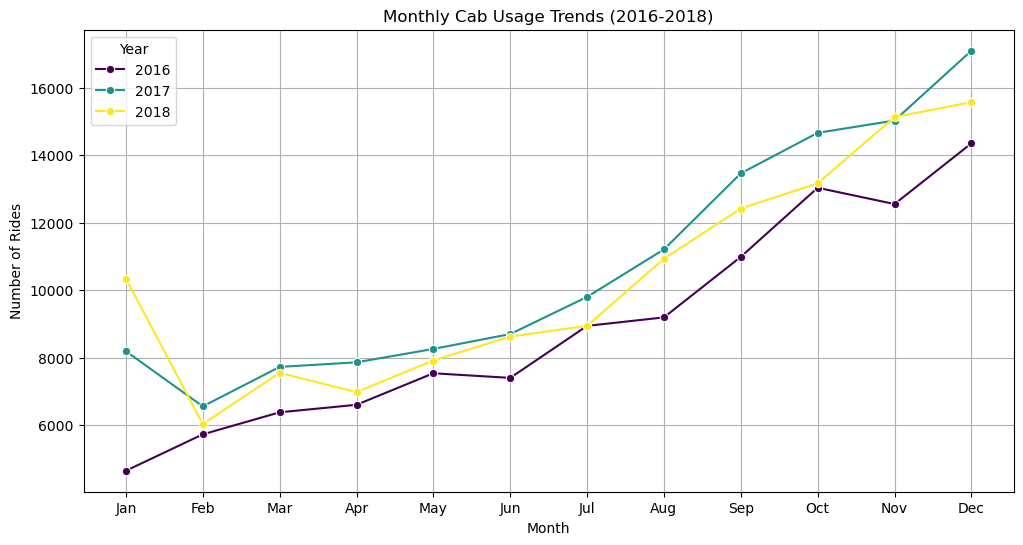

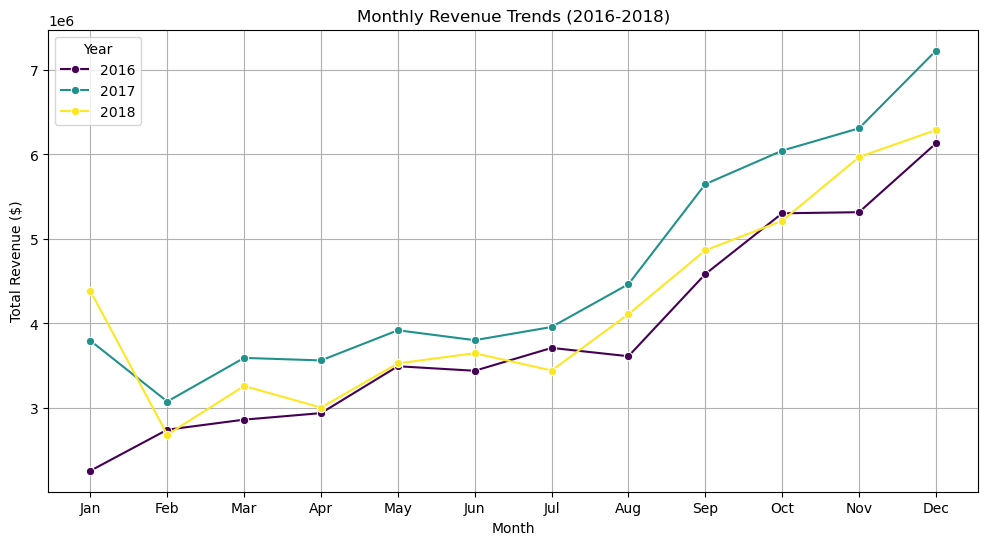

In [28]:
# Aggregate ride counts and revenue per month
monthly_analysis = merged_data.groupby(['Year', 'Month']).agg(
    Ride_Count=('Transaction ID', 'count'),
    Total_Revenue=('Price Charged', 'sum')
).reset_index()

# Plot seasonal ride count trends
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Ride_Count', hue='Year', data=monthly_analysis, marker="o", palette="viridis")
plt.title("Monthly Cab Usage Trends (2016-2018)")
plt.xlabel("Month")
plt.ylabel("Number of Rides")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend(title="Year")
plt.grid(True)
plt.show()

# Plot seasonal revenue trends
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Total_Revenue', hue='Year', data=monthly_analysis, marker="o", palette="viridis")
plt.title("Monthly Revenue Trends (2016-2018)")
plt.xlabel("Month")
plt.ylabel("Total Revenue ($)")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend(title="Year")
plt.grid(True)
plt.show()

===================================================================================================================
 4. •	Compare Pink Cab vs. Yellow Cab to see if both companies experience similar seasonal trends
    •	Analyze profitability variations across months to determine if certain seasons are more profitable
====================================================================================================================

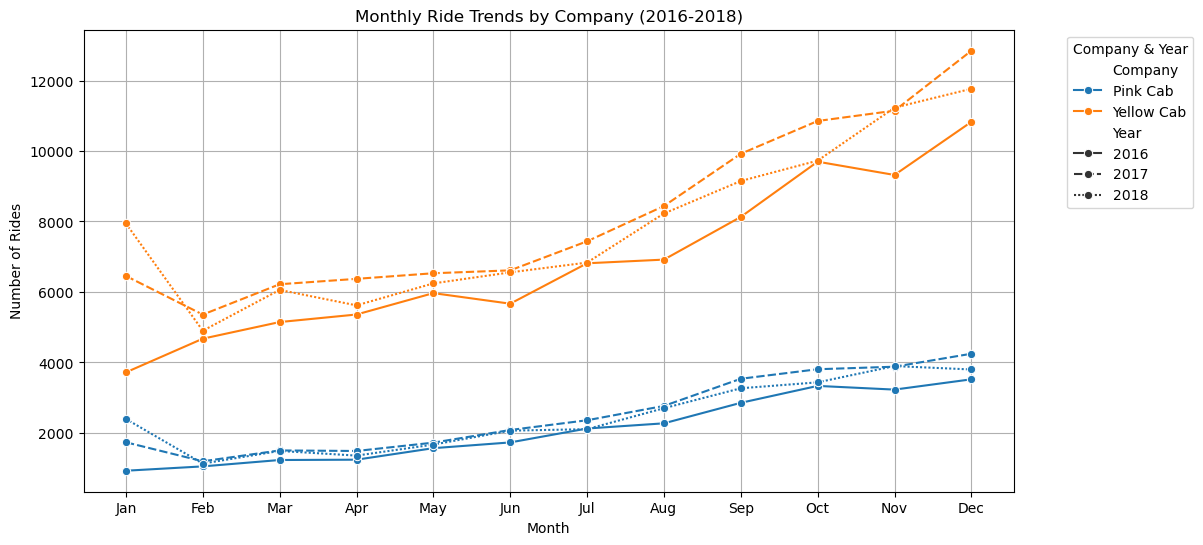

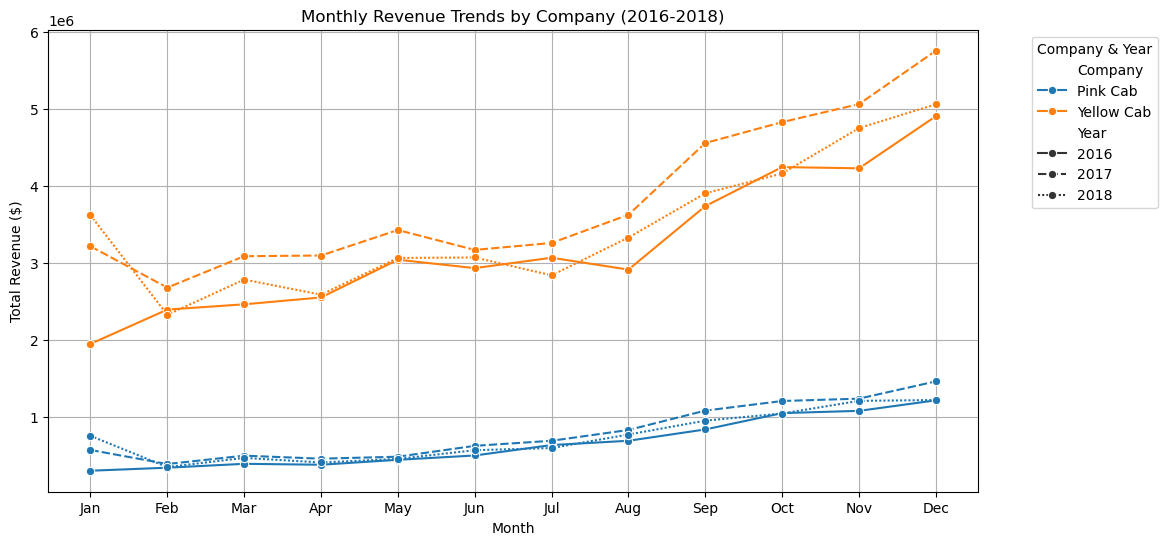

In [7]:
# Aggregate ride counts and revenue per company per month
company_monthly_analysis = merged_data.groupby(['Year', 'Month', 'Company']).agg(
    Ride_Count=('Transaction ID', 'count'),
    Total_Revenue=('Price Charged', 'sum')
).reset_index()

# Plot seasonal ride trends for each company
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Ride_Count', hue='Company', style='Year', data=company_monthly_analysis, marker="o")
plt.title("Monthly Ride Trends by Company (2016-2018)")
plt.xlabel("Month")
plt.ylabel("Number of Rides")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend(title="Company & Year", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Plot seasonal revenue trends for each company
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Total_Revenue', hue='Company', style='Year', data=company_monthly_analysis, marker="o")
plt.title("Monthly Revenue Trends by Company (2016-2018)")
plt.xlabel("Month")
plt.ylabel("Total Revenue ($)")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend(title="Company & Year", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

====================================================================================================================
 5. •	Analyze Profitability (Margins) per Company to see if higher revenue translates to higher profits.
    •	Investigate Customer Segments to check if Pink Cab attracts more high-value customers.
====================================================================================================================

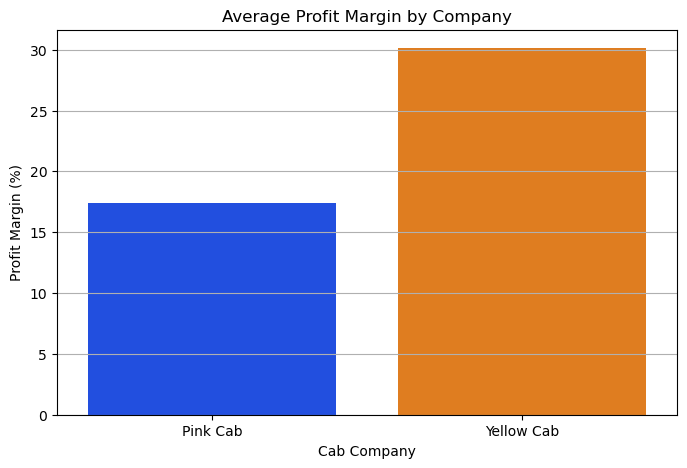

,Company,Total_Revenue,Total_Cost,Total_Profit,Avg_Profit_Margin
0,Pink Cab,2.632825e+07,2.102092e+07,5.307328e+06,17.380833
1,Yellow Cab,1.258539e+08,8.183351e+07,4.402037e+07,30.134544


In [20]:
# Calculate Profit Margin for each ride
merged_data['Profit'] = merged_data['Price Charged'] - merged_data['Cost of Trip']
merged_data['Profit Margin (%)'] = (merged_data['Profit'] / merged_data['Price Charged']) * 100

# Aggregate profitability metrics per company
profit_analysis = merged_data.groupby("Company").agg(
    Total_Revenue=('Price Charged', 'sum'),
    Total_Cost=('Cost of Trip', 'sum'),
    Total_Profit=('Profit', 'sum'),
    Avg_Profit_Margin=('Profit Margin (%)', 'mean')
).reset_index()

# Plot Profit Margins for each Company
plt.figure(figsize=(8, 5))
sns.barplot(x="Company", y="Avg_Profit_Margin", data=profit_analysis, hue ="Company", palette="bright", legend =False)
plt.title("Average Profit Margin by Company")
plt.ylabel("Profit Margin (%)")
plt.xlabel("Cab Company")
plt.grid(axis='y')
plt.show()

# Display profitability metrics
profit_analysis

====================================================================================================================
6. Customer Segmentation Analysis: Identify whether customer demographics (age, income) influence profitability
====================================================================================================================

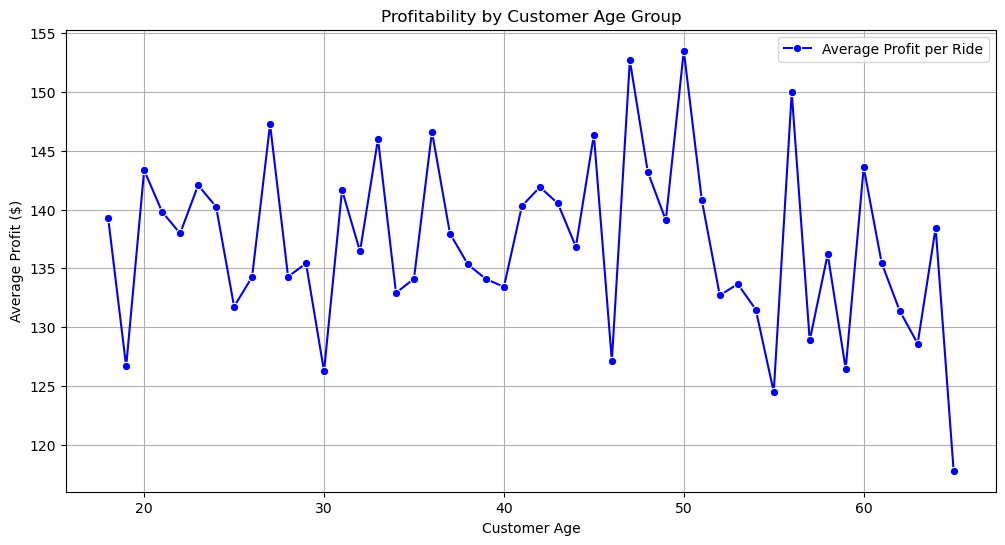

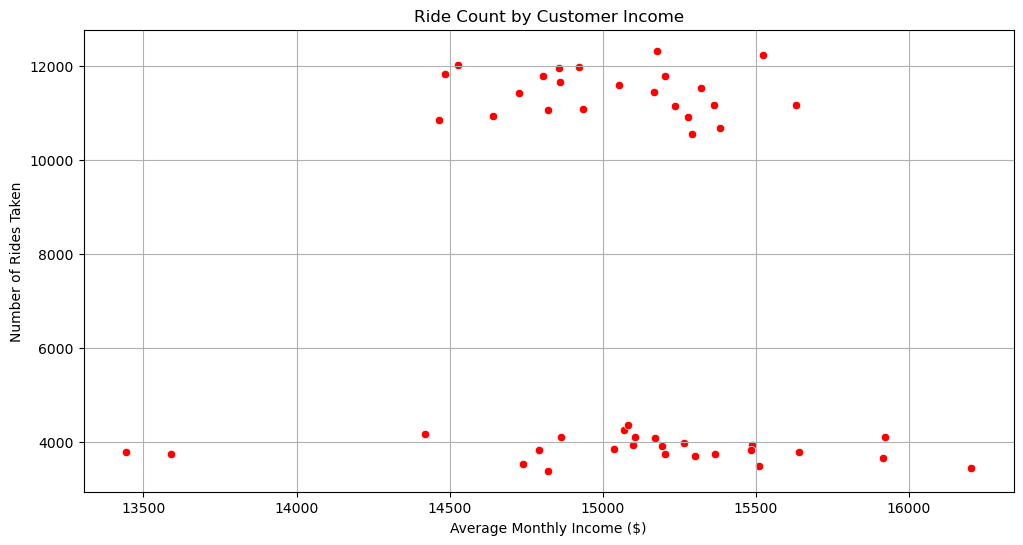

,Age,Avg_Profit,Avg_Income,Ride_Count
0,18,139.269093,14464.733542,10846
1,19,126.643224,15054.463636,11591
2,20,143.351528,15525.407229,12229
3,21,139.802696,14727.257020,11431
4,22,137.968442,15204.666328,11796


In [24]:
# Analyze Profitability by Customer Demographics (Age & Income)
customer_profit_analysis = merged_data.groupby("Age").agg(
    Avg_Profit=('Profit', 'mean'),
    Avg_Income=('Income (USD/Month)', 'mean'),
    Ride_Count=('Transaction ID', 'count')
).reset_index()

# Plot Profitability by Age Group
plt.figure(figsize=(12, 6))
sns.lineplot(x="Age", y="Avg_Profit", data=customer_profit_analysis, marker="o", color="blue", label="Average Profit per Ride")
plt.xlabel("Customer Age")
plt.ylabel("Average Profit ($)")
plt.title("Profitability by Customer Age Group")
plt.grid(True)
plt.legend()
plt.show()

# Plot Ride Count by Income Group
plt.figure(figsize=(12, 6))
sns.scatterplot(x="Avg_Income", y="Ride_Count", data=customer_profit_analysis, color="red")
plt.xlabel("Average Monthly Income ($)")
plt.ylabel("Number of Rides Taken")
plt.title("Ride Count by Customer Income")
plt.grid(True)
plt.show()

# Display insights from customer segmentation
customer_profit_analysis.head()

====================================================================================================================
7. City-Wise Profitability Analysis
====================================================================================================================

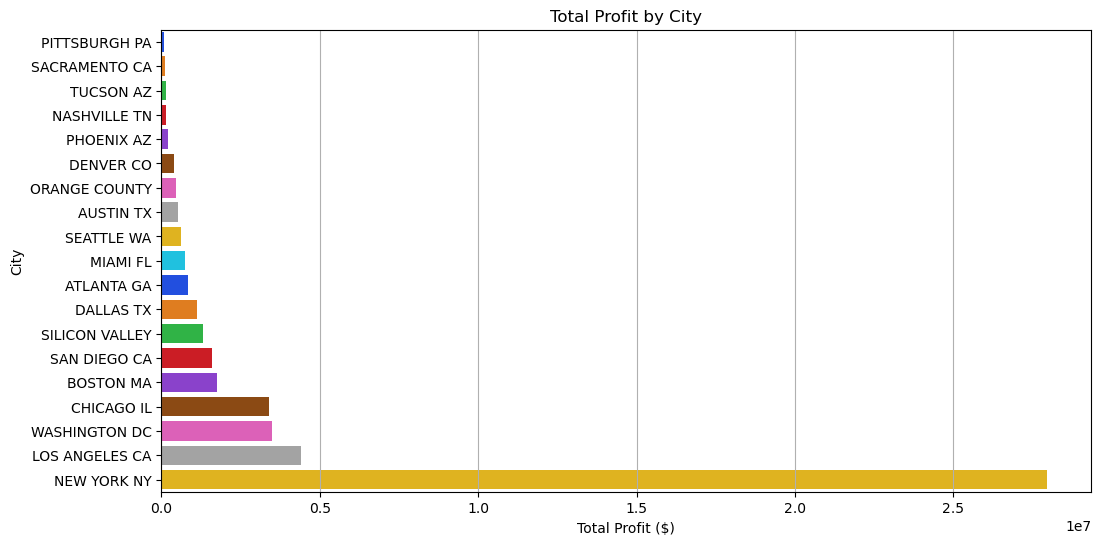

,City,Total_Revenue,Total_Cost,Total_Profit,Avg_Profit_Margin,Ride_Count
9,NEW YORK NY,56954061.67,2.899151e+07,2.796256e+07,46.634764,99885
6,LOS ANGELES CA,17795624.41,1.338392e+07,4.411709e+06,22.088178,48033
18,WASHINGTON DC,16366703.83,1.287383e+07,3.492870e+06,19.372441,43737
3,CHICAGO IL,19841318.52,1.645401e+07,3.387313e+06,14.938334,56625
2,BOSTON MA,10359755.42,8.591036e+06,1.768719e+06,15.264183,29692


In [29]:
# Aggregate profitability metrics per city
city_profit_analysis = merged_data.groupby("City").agg(
    Total_Revenue=('Price Charged', 'sum'),
    Total_Cost=('Cost of Trip', 'sum'),
    Total_Profit=('Profit', 'sum'),
    Avg_Profit_Margin=('Profit Margin (%)', 'mean'),
    Ride_Count=('Transaction ID', 'count')
).reset_index()

# Sort cities by total profit
city_profit_analysis = city_profit_analysis.sort_values(by="Total_Profit", ascending=True)

# Plot City-Wise Profitability
plt.figure(figsize=(12, 6))
sns.barplot(x="Total_Profit", y="City", data=city_profit_analysis, palette="bright", hue = "Total_Profit", legend = False)
plt.title("Total Profit by City")
plt.xlabel("Total Profit ($)")
plt.ylabel("City")
plt.grid(axis='x')
plt.show()

# Display top profitable cities
city_profit_analysis = city_profit_analysis.sort_values(by="Total_Profit", ascending=False)
city_profit_analysis.head()